### Genarate Random Data Set

In [4]:
import numpy as np

np.random.seed(0)# ensures that every time you run the code, you'll get the same random numbers.
x = 1 + 2* np.random.normal(0,1,1000)##np.random.normal(0, 1, 1000) =  generates 1000 random numbers from a normal distribution
y = x+1.5*(x**2)+0.8*(x**3) + np.random.normal(0,3,1000)

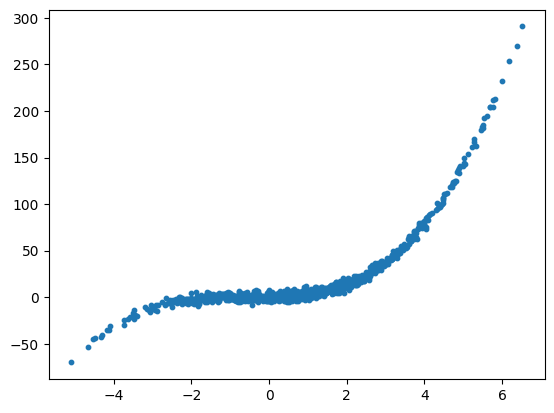

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x,y,s =10)# s means dot size
plt.show()

### Split data Into 2 sets

In [20]:
from sklearn.model_selection import train_test_split

x = x.reshape(-1, 1)  # This creates a (1000, 1) array
y = y.reshape(-1, 1)  # Similarly for y

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 1)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.25 ,random_state =1)
print(x_train.shape)

(600, 1)


In [21]:
from sklearn.linear_model import LinearRegression

lin_reg_1 = LinearRegression()
lin_reg_1.fit(x_train, y_train)
print("Degree 1 - Training Error: ", lin_reg_1.score(x_train,y_train))
print("Degree 1 - Testing Error: ", lin_reg_1.score(x_val,y_val))

Degree 1 - Training Error:  0.6112766542009314
Degree 1 - Testing Error:  0.578092525888924


### Train Polynomial Regrassion Model

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_regr = PolynomialFeatures(degree = 2)# assign polynormila to differet x (x1,x2, like wise)
x_poly2 = poly_regr.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly2,y_train)

LinearRegression()

In [26]:
x_poly_val2 = poly_regr.fit_transform(x_val)
print("Degree 2 - Training Error: ", lin_reg_2.score(x_poly2,y_train))
print("Degree 2 - Testing Error: ", lin_reg_2.score(x_poly_val2,y_val))

Degree 2 - Training Error:  0.8901821639950546
Degree 2 - Testing Error:  0.8567139925783426


In [41]:
poly_regr2 = PolynomialFeatures(degree = 3)
x_poly3 = poly_regr2.fit_transform(x_train)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(x_poly3,y_train)

LinearRegression()

In [42]:
x_poly_val3 = poly_regr2.fit_transform(x_val)
print("Degree 3 - Training Error: ", lin_reg_3.score(x_poly3,y_train))
print("Degree 3 - Testing Error: ", lin_reg_3.score(x_poly_val3,y_val)) #Hyper parameter Tuning Done

Degree 3 - Training Error:  0.9941068693023871
Degree 3 - Testing Error:  0.9941018868235563


In [43]:
poly_regr3 = PolynomialFeatures(degree = 15)
x_poly15 = poly_regr3.fit_transform(x_train)
lin_reg_15 = LinearRegression()
lin_reg_15.fit(x_poly15,y_train)
x_poly_val15 = poly_regr3.fit_transform(x_val)
print("Degree 3 - Training Error: ", lin_reg_15.score(x_poly15,y_train))
print("Degree 3 - Testing Error: ", lin_reg_15.score(x_poly_val15,y_val)) #Overfit,,according to test error

Degree 3 - Training Error:  0.9941818117060535
Degree 3 - Testing Error:  0.9882327989230353


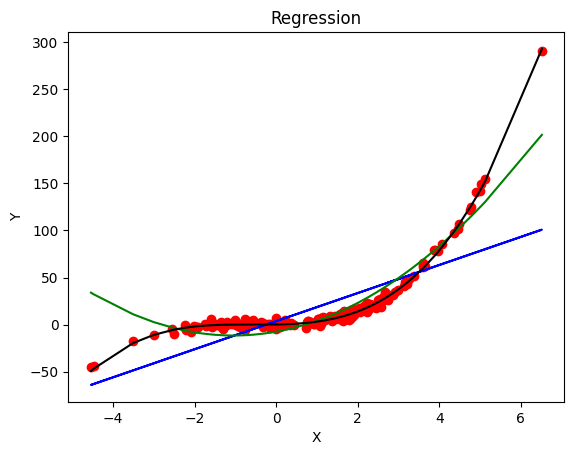

In [40]:
# Scatter plot of validation data
plt.scatter(x_val, y_val, color='red')

# Plot for linear regression (degree 1)
plt.plot(x_val, lin_reg_1.predict(x_val), color='blue')

# Plot for polynomial regression (degree 2)
x2, y2 = zip(*sorted(zip(x_val, lin_reg_2.predict(x_poly_val2)), key=lambda x: x[0]))
plt.plot(x2, y2, color='green')

# Plot for polynomial regression (degree 3)
x3, y3 = zip(*sorted(zip(x_val, lin_reg_3.predict(x_poly_val3)), key=lambda x: x[0]))
plt.plot(x3, y3, color='black')

# Add titles and labels
plt.title('Regression')
plt.xlabel('X')
plt.ylabel('Y')

# Show plot
plt.show()